# NY State Tuition Assistant Program (TAP) 2019
### TAP is a student financial aid grant program. This dataset shows TAP for elegible NY residents for the 2019 academic year.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [7]:
df=pd.read_csv('https://data.ny.gov/api/views/2t78-bs45/rows.csv?accessType=DOWNLOAD')

In [8]:
df.head()

,Academic Year,Level,TAP Level of Study,Sector Type,TAP Sector Group,Recipient Age Group,TAP Financial Status,TAP Award Schedule,TAP Degree or NonDegree,TAP Schedule Letter,"Income by $1,000 Range","Income by $5,000 Range","Income by $10,000 Range",TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
0,2019,U,5 yr Undergrad,PUBLIC,3-SUNY SO,under age 22,Financial_Dependent,Dependent_Schedule,Degree,E,"$37,001 to $38,000","$35,001 to $40,000","$30,001 to $40,000",6,5.87,10328.37
1,2019,U,4 yr Undergrad,PUBLIC,3-SUNY SO,age 26 - 35,Financial_Independent,Dependent_Schedule,Degree,E,"$21,001 to $22,000","$20,001 to $25,000","$20,001 to $30,000",20,14.34,52904.25
2,2019,U,4 yr Undergrad,PRIVATE,5-INDEPENDENT,age 36 - 50,Financial_Independent,Dependent_Schedule,Degree,D,"$26,001 to $27,000","$25,001 to $30,000","$20,001 to $30,000",2,1.80,3959.14
3,2019,U,2 yr Undergrad,PUBLIC,2-CUNY CC,over age 50,Financial_Independent,Independent_Schedule,Degree,K,"$ 7,001 to $ 8,000","$ 5,001 to $10,000","$ 0 to $10,000",1,0.53,605.75
4,2019,U,4 yr Undergrad,PRIVATE,5-INDEPENDENT,under age 22,Financial_Dependent,Dependent_Schedule,Degree,E,"$65,001 to $66,000","$65,001 to $70,000","$60,001 to $70,000",372,355.99,177996.19


In [9]:
df.drop(['Academic Year','Level','Income by $5,000 Range','Income by $10,000 Range',],axis=1,inplace=True)

Dropped some columns from the dataset that seemed reduntant. 

In [10]:
df.tail()

,TAP Level of Study,Sector Type,TAP Sector Group,Recipient Age Group,TAP Financial Status,TAP Award Schedule,TAP Degree or NonDegree,TAP Schedule Letter,"Income by $1,000 Range",TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
227755,2 yr Undergrad,PUBLIC,1-CUNY SR,age 26 - 35,Financial_Independent,Dependent_Schedule,Degree,D,"$54,001 to $55,000",1,0.75,318.75
227756,2 yr Undergrad,PUBLIC,2-CUNY CC,under age 22,Financial_Dependent,Dependent_Schedule,Degree,E,"$44,001 to $45,000",27,21.50,9137.50
227757,2 yr Undergrad,PUBLIC,4-SUNY CC,age 26 - 35,Financial_Dependent,Dependent_Schedule,Degree,D,"$33,001 to $34,000",2,1.00,425.00
227758,2 yr Undergrad,PRIVATE,8-OTHER,age 26 - 35,Financial_Independent,Dependent_Schedule,Degree,E,"$24,001 to $25,000",1,0.33,1067.33
227759,4 yr Undergrad,PUBLIC,1-CUNY SR,age 36 - 50,Financial_Independent,Dependent_Schedule,Degree,A,"$ 5,001 to $ 6,000",13,7.67,22170.60


              count  percentage
Sector Type                    
PRIVATE      100409       44.09
PUBLIC       127351       55.91


<AxesSubplot:xlabel='Sector Type'>

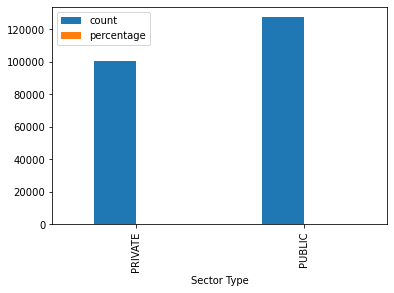

In [58]:
df1_sector_type=df.groupby(['Sector Type']).size().to_frame('count')
df1_sector_type['percentage']=round(df1_sector_type['count'].div(227760).mul(100),2)
print(df1_sector_type)
df1_sector_type.plot.bar()

It shows that more number of public sector institutes,than private sector institutes, have enrolled NY state TAP recepients for undergrade degree programs. 

In [62]:
total_grant=df['TAP Recipient Dollars'].sum().round()
print('Total amount of $ {} under TAP financial aid grant has been awarded to eligible NY state residents for the academic year 2019.'.format(total_grant))

Total amount of $ 17090549231.0 under TAP financial aid grant has been awarded to eligible NY state residents for the academic year 2019.


In [66]:
import scipy.stats as st

In [74]:
df.corr()

,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
TAP Recipient Headcount,1.000000,0.995266,0.936353
TAP Recipient FTEs,0.995266,1.000000,0.943362
TAP Recipient Dollars,0.936353,0.943362,1.000000


<AxesSubplot:>

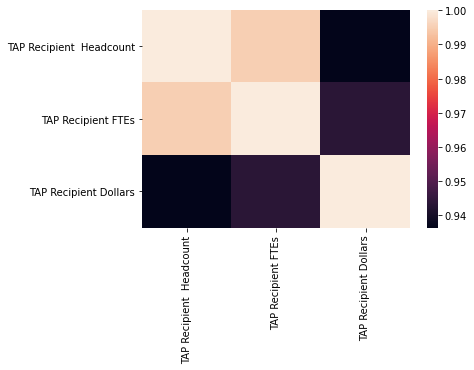

In [71]:
sns.heatmap(df.corr())

The heatmap and the table show correlation amoung variables that have numerical values in the dataset. The variables have positive correlation -  more number of grant recipients leading to larger grant amount and vice-versa, similarly in the cases of correlation between grant dollar amount and number of students enrolled in full-time and part-time degree programs (i.e; TAP Recipient FTEs).

NameError: name 'data' is not defined

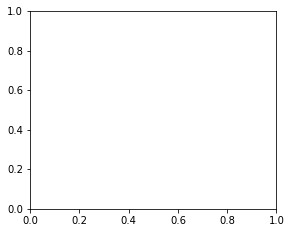

In [77]:
plt.figure(figsize=(15,8))
plt.subplot(231)
sns.scatterplot(data['TAP Recipient Headcount'],data['TAP Recipient FTEs'])
plt.subplot(232)
sns.scatterplot(data['TAP Recipient Headcount'],data['TAP Recipient Dollars'])
plt.subplot(233)
sns.scatterplot(data['TAP Recipient Dollars'],data['TAP Recipient FTEs'])